In [258]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics


In [259]:
minst = fetch_openml('mnist_784', version = 1,  as_frame = False)
minst.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [260]:
X_train_img, Y_test_img ,train_lbl, test_lbl = train_test_split(minst.data, minst.target, test_size = 1/7.0, random_state = 2)

In [261]:
pd.DataFrame(X_train_img)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
scaler = StandardScaler()

In [263]:
scaler.fit(X_train_img)

StandardScaler()

In [264]:
X_train_img = scaler.transform(X_train_img)
Y_test_img = scaler.transform(Y_test_img)

In [265]:
pd.DataFrame(X_train_img)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0


In [266]:
pca = PCA(.95)

In [267]:
pca.fit(X_train_img)

PCA(n_components=0.95)

In [268]:
train_img = pca.transform(X_train_img)
test_img = pca.transform(Y_test_img)

In [269]:
pd.DataFrame(X_train_img)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.032159,-0.023153,-0.016939,-0.010238,-0.007613,-0.00577,0.0,0.0,0.0,0.0


In [283]:
claster_KMeans = KMeans(n_clusters= 10, init= 'random')

In [284]:
claster_KMeans.fit(train_img)

KMeans(init='random', n_clusters=10)

In [285]:
centroids = claster_KMeans.cluster_centers_
label = claster_KMeans.fit_predict(train_img)

In [286]:
pd.DataFrame(label)

,0
0,2
1,3
2,6
3,3
4,4
...,...
59995,0
59996,4
59997,6
59998,3


In [287]:
metrics.rand_score(train_lbl, claster_KMeans.labels_)

0.8646633827230454

In [289]:
clusters = pd.DataFrame({'labels': train_lbl, 'cluster': label})
dominant_labels = clusters.groupby('cluster')['labels'].agg(lambda x: x.mode()[0])

In [292]:
def plot_images(images, labels, true_labels):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 2))
    for ax, image, label, true_label in zip(axes, images, labels, true_labels):
        ax.imshow(image.reshape(28, 28), cmap='gray')
        ax.set_title(f'Predicted: {label}\n True label: {true_label}')
        ax.axis('off')
    plt.show()

Klaster: 0, Etykieta dominująca: 5


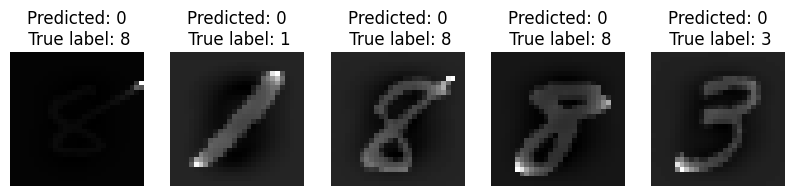

Klaster: 1, Etykieta dominująca: 2


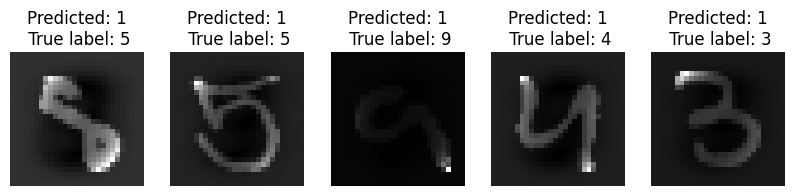

Klaster: 2, Etykieta dominująca: 4


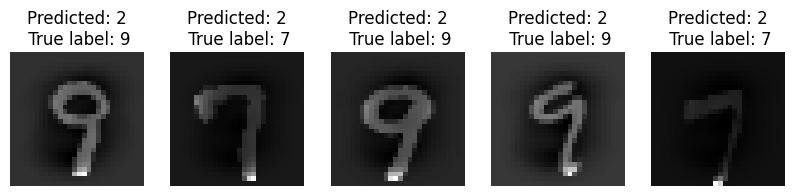

Klaster: 3, Etykieta dominująca: 1


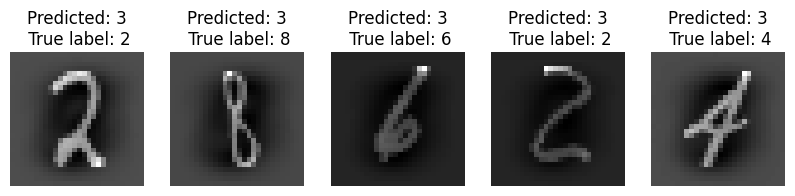

Klaster: 4, Etykieta dominująca: 3


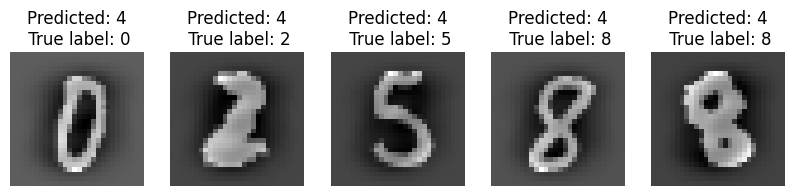

Klaster: 5, Etykieta dominująca: 0


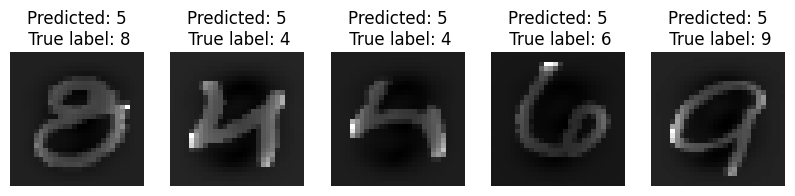

Klaster: 6, Etykieta dominująca: 7


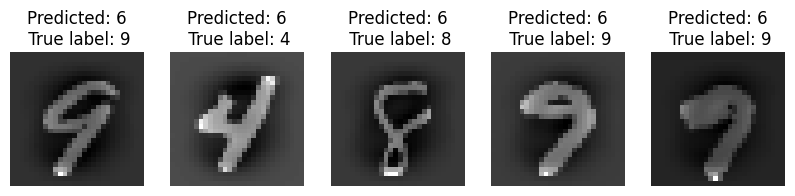

Klaster: 7, Etykieta dominująca: 6


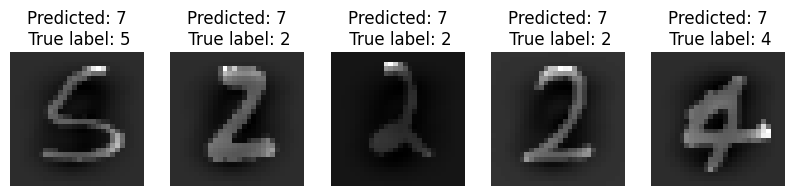

Klaster: 8, Etykieta dominująca: 2


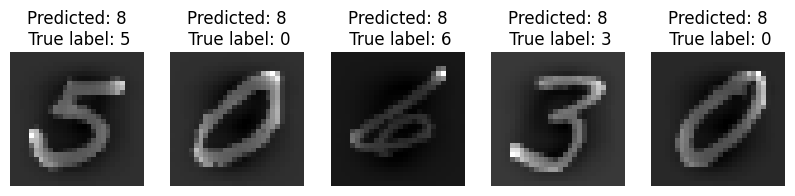

Klaster: 9, Etykieta dominująca: 7


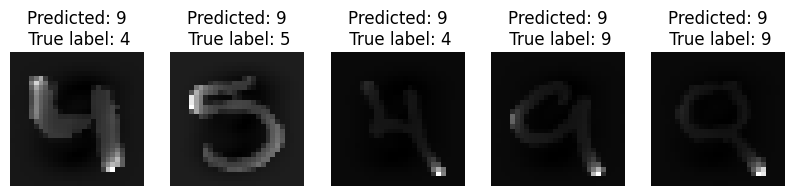

In [293]:
for cluster_number, dominant_label in dominant_labels.items():
    cluster_indices = clusters[(clusters['cluster'] == cluster_number) & (clusters['labels'] != dominant_label)].index[:5]
    wrong_images = X_train_img[cluster_indices]
    wrong_labels = clusters.loc[cluster_indices, 'cluster']
    true_labels = clusters.loc[cluster_indices, 'labels']
    print(f"Klaster: {cluster_number}, Etykieta dominująca: {dominant_label}")
    plot_images(wrong_images, wrong_labels, true_labels)

In [275]:
xs = train_img[:,0]
ys = train_img[:,1]
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

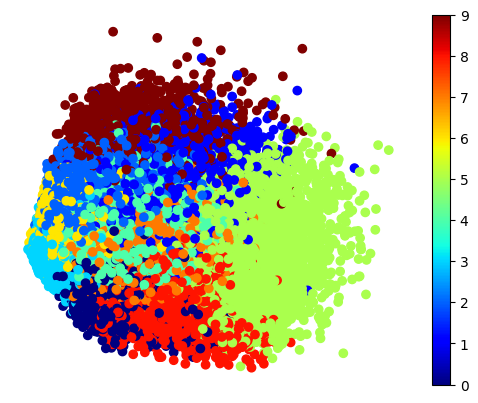

In [294]:
plt.scatter(xs, ys, c = label, cmap = "jet")
plt.axis("off")
plt.colorbar()
plt.show()

In [277]:
pd.DataFrame(train_lbl)

,0
0,9
1,1
2,9
3,2
4,0
...,...
59995,5
59996,3
59997,7
59998,1


In [278]:
labels = pd.DataFrame()
centroid = pd.DataFrame()

In [279]:
labels

""


In [280]:

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init= 'random')
    kmeans.fit(train_img)
    labels[f'Kmeans_{i}'] = kmeans.labels_

In [281]:
labels

,Kmeans_1,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5,Kmeans_6,Kmeans_7,Kmeans_8,Kmeans_9,Kmeans_10
0,0,0,2,3,1,3,6,4,1,1
1,0,0,1,1,3,5,4,3,5,4
2,0,0,2,3,1,3,6,4,3,3
3,0,0,1,1,3,5,4,3,5,4
4,0,0,1,1,4,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,2,3,1,3,6,7,1,0
59996,0,0,2,3,4,1,0,0,0,8
59997,0,0,2,3,1,3,6,4,3,3
59998,0,0,1,1,3,5,4,3,5,4


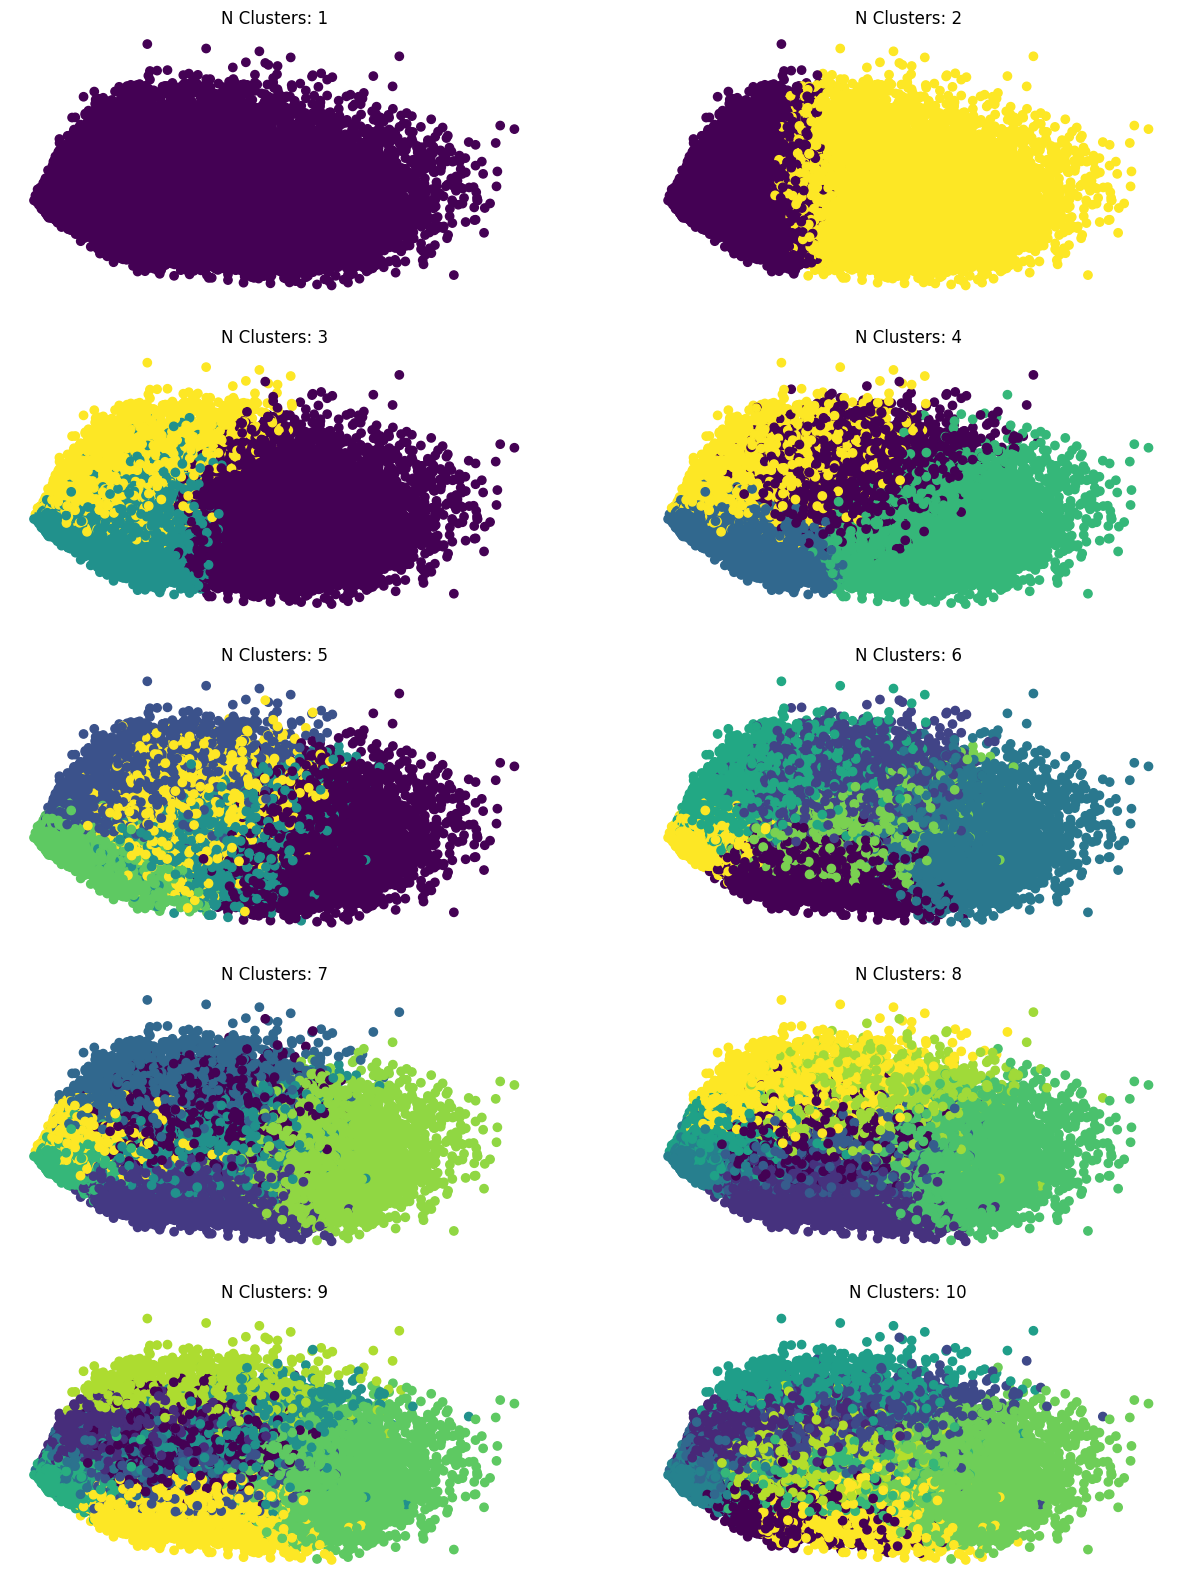

In [282]:
fig, axs = plt.subplots(nrows= 5, ncols= 2, figsize = (15,20))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(xs, ys, c = labels[f'Kmeans_{i}'])
    ax.axis('off')
    ax.set_title(f'N Clusters: {i}')

In [ ]:
clusters = pd.DataFrame({'labels': train_labels_original, 'cluster': labels})
dominant_labels = clusters.groupby('cluster')['labels'].agg(lambda x: x.mode()[0])

In [ ]:
def plot_images(images, labels, true_labels):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 2))
    for ax, image, label, true_label in zip(axes, images, labels, true_labels):
        ax.imshow(image.reshape(28, 28), cmap='gray')
        ax.set_title(f'Przewidywana: {label}\n Prawdziwa: {true_label}')
        ax.axis('off')
    plt.show()

In [ ]:
for cluster_number, dominant_label in dominant_labels.items():
    cluster_indices = clusters[(clusters['cluster'] == cluster_number) & (clusters['labels'] != dominant_label)].index[:5]
    wrong_images = train_img_original[cluster_indices]  # Wybierz pierwszych pięć obrazów
    wrong_labels = clusters.loc[cluster_indices, 'cluster']  # Przewidziane etykiety klastra
    true_labels = clusters.loc[cluster_indices, 'labels']  # Rzeczywiste etykiety
    print(f"Klaster: {cluster_number}, Etykieta dominująca: {dominant_label}")
    plot_images(wrong_images, wrong_labels, true_labels)